In [2]:
import os

from astropy.io import fits

import detector

import matplotlib.pyplot as plt

In [3]:
path = '/home/talens-irex/Research/NIRISS/GJ436'
file = os.path.join(path, 'jw00001001001_0110100001_NISRAPID_cal_c.fits')

# Adding noise to the simulations.

In this notebook we demonstrate how to add noise the simulations, a command line interface is available as well. 

Fisrt we create simulations with only the trace and background signal, one without and one with non-linearity included.

In [4]:
detector.add_noise([file], normalize=True, flatfield=False, darkframe=False, nonlinearity=False, superbias=False,
                   detector=False)

Writing to file: /home/talens-irex/Research/NIRISS/GJ436/jw00001001001_0110100001_NISRAPID_cal_c_mod_norm_poisson_noise_zodibackg.fits


In [5]:
detector.add_noise([file], normalize=True, flatfield=False, darkframe=False, superbias=False, detector=False)

Writing to file: /home/talens-irex/Research/NIRISS/GJ436/jw00001001001_0110100001_NISRAPID_cal_c_mod_norm_poisson_noise_zodibackg_nonlin.fits


Quickly verify the non-linear signal.

In [6]:
flux_linear = fits.getdata(os.path.join(path, 'jw00001001001_0110100001_NISRAPID_cal_c_mod_norm_poisson_noise_zodibackg.fits'), ext=1)
flux_nonlinear = fits.getdata(os.path.join(path, 'jw00001001001_0110100001_NISRAPID_cal_c_mod_norm_poisson_noise_zodibackg_nonlin.fits'), ext=1)

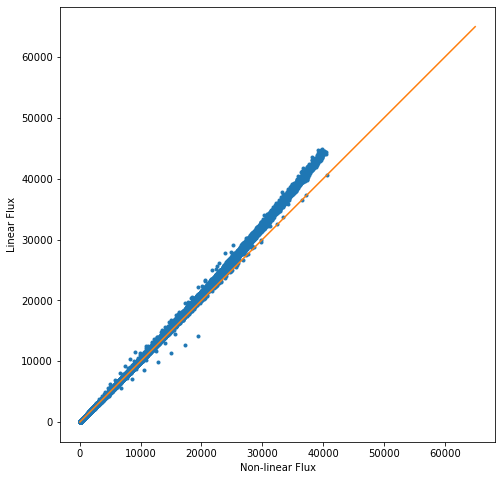

In [7]:
plt.figure(figsize=(8,8))
plt.plot(flux_nonlinear.ravel(), flux_linear.ravel(), '.')
plt.plot([0, 65000], [0, 65000])
plt.xlabel('Non-linear Flux')
plt.ylabel('Linear Flux')
plt.gca().set_aspect('equal')

Now we creata a simulation with all implemented noise sources.

In [8]:
detector.add_noise([file], normalize=True)

Writing to file: /home/talens-irex/Research/NIRISS/GJ436/jw00001001001_0110100001_NISRAPID_cal_c_mod_norm_poisson_noise_zodibackg_flat_dark_nonlin_bias_detector.fits


Plot the final group of the first integration.

In [9]:
flux_noise = fits.getdata(os.path.join(path, 'jw00001001001_0110100001_NISRAPID_cal_c_mod_norm_poisson_noise_zodibackg_flat_dark_nonlin_bias_detector.fits'), ext=1)

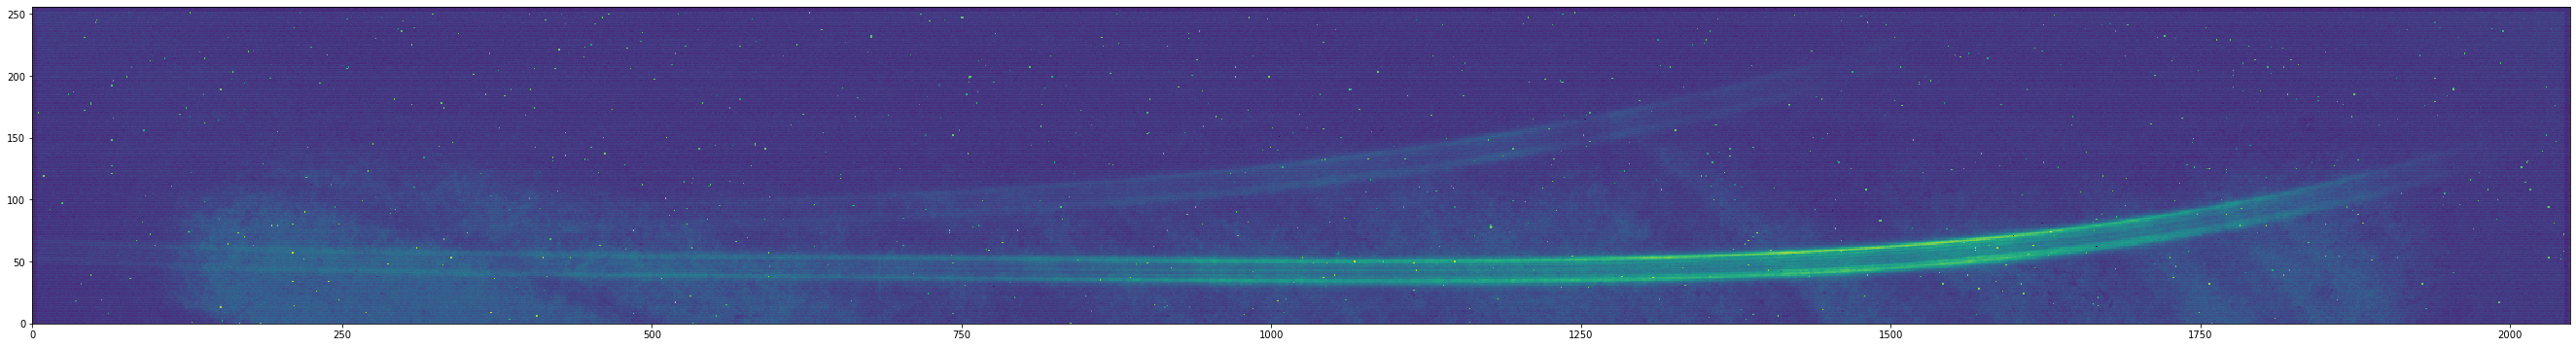

In [10]:
plt.figure(figsize=(6*8, 6))
plt.subplot(111, aspect='equal')
plt.pcolormesh(flux_noise[0,9])

Finally add noise the the full simulation. This requires a lot of memory. When using the normalize option passing multiple files will give each file the same normalization. If you have seprate simulations pass the files for each simulation in a sperate call to add_noise.

In [11]:
filelist = ['jw00002001001_0110100001_NISRAPID_cal_c.fits',
            'jw00002001001_0110100002_NISRAPID_cal_c.fits']
filelist = [os.path.join(path, filename) for filename in filelist]

In [ ]:
detector.add_noise(filelist, normalize=True)